# Contents
1. **Single Layer Neural Networks**. We look at how a single layer network performs on a toy dataset
2. **Multilayer Perceptrons**. We look at how multiple layers perform on toy datasets
2. **Handwritten digit recognition in sklearn**. Learning to classify numbers using the libraries in sklearn
2. **Handwritten digit recognition in Tensorflow**. Learning to classify numbers using libraries in Tensorflow

Finally, try working through some tutorials in TensorFlow and play around with the different hyperparameter choices. Links to tutorials are at the end of the notebook.

# Single Layer Neural Network

In this question we apply a single-layer neural network to a linearly separable toy data set.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron

We start by generating  and visualizing some data

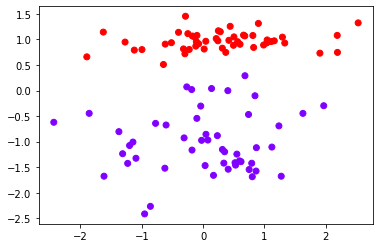

[0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1]


In [11]:
X1, y1 = make_classification(n_features=2, n_redundant=0, \
            n_informative=1, random_state=1,n_clusters_per_class=1)
fig1, ax1 = plt.subplots();
ax1.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.show()
print(y1)

Notice that the two classes can clearly be separated by a single line. We can now fit a single layer neural network to the data.

In [4]:
nn1=Perceptron(alpha=1, max_iter=1000)
model=nn1.fit(X1,y1)

(Optional) Plot the line that the perceptron is modelling. Look at the documentation to find out how you can get the values of the weights and the bias.


We can visualise the performance of this network again using a scatter plot, and colour the points using predicted class. Is the network able to give the right classification for each point?

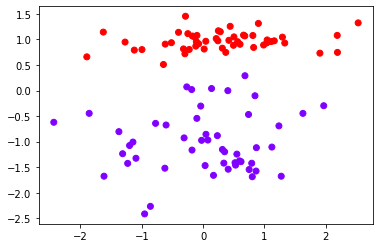

1.0


In [14]:
ypred1=model.predict(X1)
# TODO: Make a scatter plot of the predictions.
# How do the predictions compare with the ground truth? Compute the accuracy to compare
fig2, ax2 = plt.subplots()
ax2.scatter(X1[:,0],X1[:,1],c=ypred1, cmap='rainbow')
plt.show()
print(model.score(X1,y1))


# Multi-Layer NN on Toy Problems
In this question we consider two toy problems in which the classes are not linearly separable. In the first example the two classes form moon shapes.

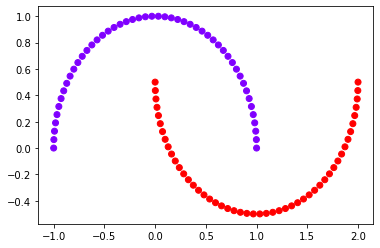

In [17]:
X2, y2 = make_moons()
fig2, ax2 = plt.subplots()
ax2.scatter(X2[:,0],X2[:,1],c=y2, cmap='rainbow')

Try fitting a single-layer neural network to the data. 
Comment on the performance and hypothesise what might be the source of the errors.

0.86


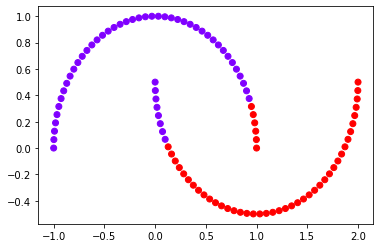

In [24]:
#TODO
nn1_moon=Perceptron(alpha=1, max_iter=1000)
model=nn1_moon.fit(X2,y2)
ypred2=model.predict(X2)
fig3, ax3 = plt.subplots()
ax3.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')
print(model.score(X2,y2))



We can now try to fit an multi-layer NN to the same data.

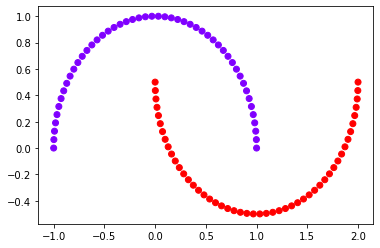

In [25]:
nn2=MLPClassifier(alpha=1,hidden_layer_sizes=(10,10,10,10), max_iter=1000)
model2=nn2.fit(X2,y2)
ypred2=model2.predict(X2)
fig4, ax4 = plt.subplots()
ax4.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')


This NN has 4 hidden layers each with 10 neurons. The parameter
`hidden_layer_sizes=(x,y,z, ...)` identifies the number of neurons in each layer. Try experimenting with different configurations of hidden layers to see the effect on performance.

Investigate the parameter `activation`. What are the different activation functions?

The activation functions are:

We now introduce another toy classification problem based on classes in the form of two circles. Experiment with using different NN architectures to fit this data and plot the results.

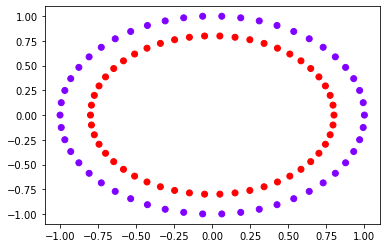

[0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [45]:
X3, y3 = make_circles()
fig3, ax3 = plt.subplots()
ax3.scatter(X3[:,0],X3[:,1],c=y3, cmap='rainbow')
plt.show()
print(y3)

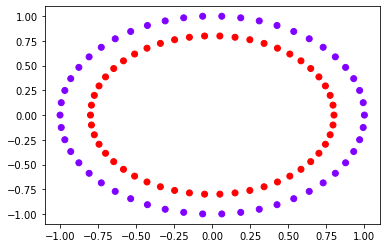

In [90]:
# TODO
fig, ax = plt.subplots()
activations = ['identity', 'logistic', 'tanh', 'relu']
nn3 = MLPClassifier(alpha= 0.1, hidden_layer_sizes=(100, 100, 100, 100), max_iter=1000, activation = activations[3])
model3 = nn3.fit(X3, y3)
ypred3 = model3.predict(X3)
ax.scatter(X3[:, 0], X3[:, 1], c=ypred3, cmap='rainbow')
plt.show()

# Handwritten Digit Recognition
The data set contains images of hand-written digits. There are 10 classes where each class refers to a digit. Preprocessing programs were used to extract normalized bitmaps of handwritten digits from a preprinted form.  32 × 32 bitmaps are divided into non-overlapping blocks of 4 × 4 and the number of on pixels are counted in each block. This generates an input matrix of 8 × 8 where each element is an integer in the range 0...16.

In [67]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.datasets import load_digits
digits = load_digits()

Divide the data into training and test sets, fit a NN to the training data and evaulate its accuracy on both training and test data.

In [91]:
#TODO
activations = ['identity', 'logistic', 'tanh', 'relu']
Xtr, Xtest,ytr,ytest = train_test_split(digits.data,digits.target,test_size = 0.3)
nn4 = MLPClassifier(alpha=1, hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=1000)
model4 = nn4.fit(Xtr,ytr)
print(nn4.score(Xtr,ytr))
print(nn4.score(Xtest,ytest))


1.0
0.9814814814814815


It is also useful to plot a time series graph of the loss function (error) against iteration.

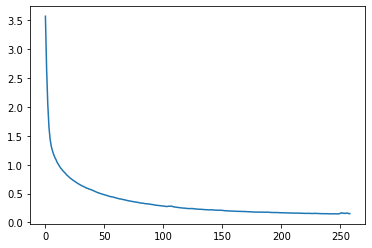

In [92]:
loss_values = model4.loss_curve_
plt.figure() 
plt.plot(loss_values)
plt.show()

Try experimenting with different architectures and activation functions. 

## Handwritten digit recognition in Tensorflow
This is an excerpt from a tutorial in Tensorflow, available at https://www.tensorflow.org/tutorials/quickstart/beginner. Tensorflow has lots of tutorials if you want to investigate. 

In this tutorial, you are asked to:

1. Load a prebuilt dataset.
2. Build a neural network machine learning model that classifies images.
2. Train this neural network.
2. Evaluate the accuracy of the model.


We firstly import TensorFlow. You may need to install TensorFlow first.

In [94]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.8.0


## Load the MNIST digits dataset

Load the dataset and convert data from integgers into floating point numbers:

In [95]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11501568/11490434 [==============================] - 6s 0us/step


## Build a machine learning model

Here, the model is a sequential model, meaning that it has a feed-forward architecture rather than a recurrent architecture or otherwise.

We set up a Sequential model and then add layers to it. Each layer can have different types: Flatten, Dense, Dropout. Look through the documentation for each layer to find out about them.

In [97]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


For each datapoint, the model returns a vector of logits or log-odds scores, one for each class. Below, we make predictions for just one datapoint.

In [98]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.45772973,  0.03017277,  0.39781544, -0.05679082, -0.16698846,
         0.13146862, -0.32079506,  0.18304504,  0.37936348, -0.14485943]],
      dtype=float32)

The tf.nn.softmax function converts these logits to probabilities for each class - now we have the probabilities that this datapoint belongs to each class.

In [99]:
tf.nn.softmax(predictions).numpy()

array([[0.06121287, 0.09970942, 0.14401288, 0.09140466, 0.08186725,
        0.11033884, 0.07019606, 0.11617903, 0.14137992, 0.08369907]],
      dtype=float32)

For training the model, we need to define a loss function. We will use losses.SparseCategoricalCrossentropy, which takes a vector of logits and a True index and returns a scalar loss for each example.

In [100]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [101]:
loss_fn(y_train[:1], predictions).numpy()


2.2041993

Before we start training, we compile the model, setting the kind of optimizer we want to use (`adam`, the loss function, as set up above, and the metric we want to measure (`accuracy`).

In [102]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


Train and evaluate your model
Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [103]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2988 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1465 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1090 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0897 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9771


The `Model.evaluate` method checks the model's performance

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

The model is now trained to almost 98% accuracy. We evaluated the mode on the test set. Can you evaluate it on the training set? Try altering the structure of the network that we set up. Can you change the performance? It will be quite difficult to improve on 98% - but see if you can make it worse! What sort of changes can you make? What effect do they have?

### The fashion MNIST dataset
To consolidate your learning, work through the tutorial at https://www.tensorflow.org/tutorials/keras/classification that shows you how to classify images of clothing using a neural network in TensorFlow.

Try to 
1. Change the structure of the network. Can you change the performance of the network?
2. Read about the different optimizers at https://www.tensorflow.org/api_docs/python/tf/keras/optimizers. Can you compile the model with a different optimizer? What effect does this have?
2. Try changing the loss function. How can you change the loss function? What options are there?

More tutorials to try: 
1. Convolutional Neural Network https://www.tensorflow.org/tutorials/images/cnn
2. Generative Adversarial Networks https://www.tensorflow.org/tutorials/generative/dcgan
2. (More complex) Text Classification with RNNS https://www.tensorflow.org/text/tutorials/text_classification_rnn